In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('df_all_phone_both.csv')
print(df)

      "ACTIVITY"   "X0"   "X1"   "X2"   "X3"   "X4"  "X5"  "X6"  "X7"  "X8"  \
0           b'A'  0.235  0.470  0.275  0.020  0.000   0.0   0.0   0.0   0.0   
1           b'A'  0.275  0.440  0.270  0.015  0.000   0.0   0.0   0.0   0.0   
2           b'A'  0.320  0.430  0.245  0.000  0.005   0.0   0.0   0.0   0.0   
3           b'A'  0.315  0.495  0.185  0.005  0.000   0.0   0.0   0.0   0.0   
4           b'A'  0.215  0.455  0.325  0.005  0.000   0.0   0.0   0.0   0.0   
...          ...    ...    ...    ...    ...    ...   ...   ...   ...   ...   
40350       b'S'  0.010  0.510  0.480  0.000  0.000   0.0   0.0   0.0   0.0   
40351       b'S'  0.000  0.440  0.560  0.000  0.000   0.0   0.0   0.0   0.0   
40352       b'S'  0.000  0.495  0.505  0.000  0.000   0.0   0.0   0.0   0.0   
40353       b'S'  0.000  0.500  0.500  0.000  0.000   0.0   0.0   0.0   0.0   
40354       b'S'  0.015  0.520  0.465  0.000  0.000   0.0   0.0   0.0   0.0   

       ...  "ZMFCC11"  "ZMFCC12"   "XYCOS"   "XZCOS

In [3]:
df = df.replace("b'1600'", 0)
df = df.replace("b'1601'", 1)
df = df.replace("b'1602'", 2)
df = df.replace("b'1603'", 3)
df = df.replace("b'1604'", 4)
df = df.replace("b'1605'", 5)
df = df.replace("b'1606'", 6)
df = df.replace("b'1607'", 7)
df = df.replace("b'1608'", 8)
df = df.replace("b'1609'", 9)
df = df.replace("b'1610'", 10)
df = df.replace("b'1611'", 11)
df = df.replace("b'1612'", 12)
df = df.replace("b'1613'", 13)
df = df.replace("b'1615'", 15)
df = df.replace("b'1616'", 16)
df = df.replace("b'1617'", 17)
df = df.replace("b'1618'", 18)
df = df.replace("b'1619'", 19)
df = df.replace("b'1620'", 20)
df = df.replace("b'1621'", 21)
df = df.replace("b'1622'", 22)
df = df.replace("b'1623'", 23)
df = df.replace("b'1624'", 24)
df = df.replace("b'1625'", 25)
df = df.replace("b'1626'", 26)
df = df.replace("b'1627'", 27)
df = df.replace("b'1628'", 28)
df = df.replace("b'1629'", 29)
df = df.replace("b'1630'", 30)
df = df.replace("b'1631'", 31)
df = df.replace("b'1632'", 32)
df = df.replace("b'1633'", 33)
df = df.replace("b'1634'", 34)
df = df.replace("b'1635'", 35)
df = df.replace("b'1636'", 36)
df = df.replace("b'1637'", 37)
df = df.replace("b'1638'", 38)
df = df.replace("b'1639'", 39)
df = df.replace("b'1640'", 40)
df = df.replace("b'1641'", 41)
df = df.replace("b'1642'", 42)
df = df.replace("b'1643'", 43)
df = df.replace("b'1644'", 44)
df = df.replace("b'1645'", 45)
df = df.replace("b'1646'", 46)
df = df.replace("b'1647'", 47)
df = df.replace("b'1648'", 48)
df = df.replace("b'1649'", 49)
df = df.replace("b'1650'", 50)
print(df)

      "ACTIVITY"   "X0"   "X1"   "X2"   "X3"   "X4"  "X5"  "X6"  "X7"  "X8"  \
0           b'A'  0.235  0.470  0.275  0.020  0.000   0.0   0.0   0.0   0.0   
1           b'A'  0.275  0.440  0.270  0.015  0.000   0.0   0.0   0.0   0.0   
2           b'A'  0.320  0.430  0.245  0.000  0.005   0.0   0.0   0.0   0.0   
3           b'A'  0.315  0.495  0.185  0.005  0.000   0.0   0.0   0.0   0.0   
4           b'A'  0.215  0.455  0.325  0.005  0.000   0.0   0.0   0.0   0.0   
...          ...    ...    ...    ...    ...    ...   ...   ...   ...   ...   
40350       b'S'  0.010  0.510  0.480  0.000  0.000   0.0   0.0   0.0   0.0   
40351       b'S'  0.000  0.440  0.560  0.000  0.000   0.0   0.0   0.0   0.0   
40352       b'S'  0.000  0.495  0.505  0.000  0.000   0.0   0.0   0.0   0.0   
40353       b'S'  0.000  0.500  0.500  0.000  0.000   0.0   0.0   0.0   0.0   
40354       b'S'  0.015  0.520  0.465  0.000  0.000   0.0   0.0   0.0   0.0   

       ...  "ZMFCC11"  "ZMFCC12"   "XYCOS"   "XZCOS

In [4]:
def knn_classifier(X_train, Y_train, X_test):
    classifier =  KNeighborsClassifier(n_neighbors = 5)
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)

    return Y_pred

In [5]:
df[df['"class"'] == 10]

,"""ACTIVITY""","""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""",...,"""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT""","""class"""
7287,b'A',0.060,0.110,0.215,0.255,0.240,0.070,0.030,0.010,0.005,...,0.550898,0.543819,0.751094,-0.005809,-0.376951,0.383184,0.377359,-0.103380,10.74990,10
7288,b'A',0.050,0.130,0.170,0.220,0.285,0.090,0.020,0.020,0.010,...,0.545153,0.538148,0.741898,0.069865,-0.368142,0.361264,0.488030,-0.070615,10.86330,10
7289,b'A',0.070,0.135,0.165,0.250,0.190,0.130,0.025,0.015,0.010,...,0.580717,0.573254,0.689070,0.227904,-0.299957,0.255459,0.568801,-0.134642,10.97220,10
7290,b'A',0.075,0.145,0.140,0.205,0.275,0.105,0.010,0.025,0.020,...,0.578014,0.570586,0.686601,0.244267,-0.280844,0.259784,0.567380,-0.128378,10.98140,10
7291,b'A',0.085,0.145,0.145,0.175,0.285,0.100,0.030,0.020,0.005,...,0.568111,0.560811,0.700471,0.057924,-0.399338,0.311718,0.398679,-0.245695,10.87960,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12084,b'S',0.000,0.000,0.000,0.010,0.990,0.000,0.000,0.000,0.000,...,0.139018,0.137232,0.996417,-0.943348,-0.962296,-0.925163,0.760681,-0.631544,9.71209,10
12085,b'S',0.000,0.000,0.000,0.005,0.995,0.000,0.000,0.000,0.000,...,0.133048,0.131338,0.997755,-0.964634,-0.974243,-0.888958,0.620705,-0.441778,9.71069,10
12086,b'S',0.000,0.000,0.000,0.025,0.965,0.005,0.005,0.000,0.000,...,0.270986,0.267504,0.991862,-0.839231,-0.881601,-0.200215,0.717431,-0.122214,9.73490,10
12087,b'S',0.000,0.000,0.000,0.020,0.980,0.000,0.000,0.000,0.000,...,0.210145,0.207445,0.994545,-0.933718,-0.954858,-0.900874,0.648680,-0.478537,9.73453,10


In [6]:
f1 = []
for i in range(0,51):
    if i not in range (10, 19):
        df_train = df[df['"class"'] != i]
        df_test = df[df['"class"'] == i]
        Y_train = df_train.iloc[:,0].values
        X_train = df_train.iloc[:, 1:92].values
        # print(Y_train)
        # print(X_train)
        Y_test = df_test.iloc[:,0].values
        X_test = df_test.iloc[:, 1:92].values
        Y_pred = knn_classifier(X_train, Y_train, X_test)
        cm = confusion_matrix(Y_test,Y_pred)
        f1.append(f1_score(Y_test, Y_pred, average='weighted'))
        if i ==0:
            cm_all = cm
        else:
            cm_all = cm_all + cm
print(cm_all)

[[ 721  157  446   20   22    6   31    6   13   16    8   21  268   75
    86    2   11   21]
 [ 346 1147  204    5    3    7   11    8    4    4    3   12  143   37
    31    3    8   15]
 [ 438  113  568   17   19   31   24   15    8   10    2   20  336   96
    89    3   10   35]
 [  34   12   47  345  153  196  147  125  120   99  157  110   28   52
    30  121  108   70]
 [  39    5   37  158  467  146  118   90   72  111   41   46   41  116
   113   96  104  160]
 [  14   14   39  241  182  254  145  166  129   85  119   91   11   35
    29  118  116   55]
 [  35   16   51  234  172  131  243  125  109  100   90   95   48   85
   112   88  102  114]
 [  31   17   43  253  191  177  180  116  121  149  117  102   27   52
    67  127   68   95]
 [  39   10   37  249  172  192  185  141  179  107  105  102   18   35
    32  105  115   70]
 [  37   14   37  239  223  142  183  142  124  154  118  117   30   27
    45  103   53   64]
 [  52    8   25  328  162  190  166  133  140  15

No handles with labels found to put in legend.


[0.17165439224816564, 0.22643605113241208, 0.17086802072837914, 0.22667040601453492, 0.21999957136833748, 0.23675496126328321, 0.12996721448004386, 0.19490878135826298, 0.22235283888051036, 0.17347694380462023, 0.20596895599479223, 0.098605942076418, 0.13936370723483957, 0.14135569183128796, 0.197421780949642, 0.16113942594858086, 0.14566008316785406, 0.17414211146787775, 0.15145005707717504, 0.19376943679343148, 0.16779924996680004, 0.15249162237829056, 0.23299286027319885, 0.23496482714477343, 0.13918940320819506, 0.24474185675779858, 0.18796008151044835, 0.17150879398455957, 0.1919437014970448, 0.2300987851826604, 0.2371864785118268, 0.24270581134255106, 0.10103388502710162, 0.16331653147757993, 0.1611281842919051, 0.12883844481779289, 0.1855087648824419, 0.10353693509438636, 0.24681005344514215, 0.13627287181078776, 0.19826205321106113, 0.1048852733636002]


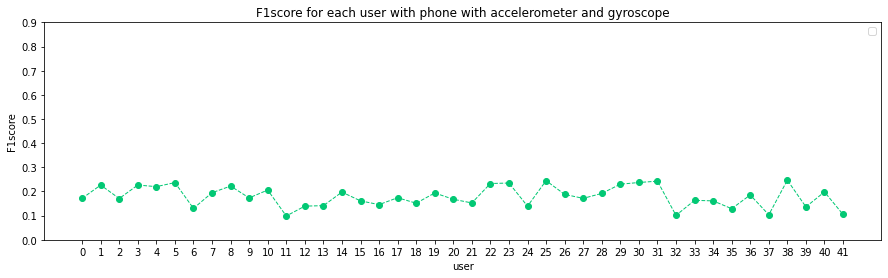

In [7]:
print(f1)
x = range(0, 42)
fig, ax = plt.subplots(figsize = (15,4))
ax.plot(x,f1,color = '#02C874', linestyle = '--', marker = 'o', linewidth=1)
ax.set_xticks(x)
ax.set_yticks(np.arange(0, 1, 0.1))
ax.set_xlabel('user')
ax.set_ylabel('F1score')
ax.set_title('F1score for each user with phone with accelerometer and gyroscope')
ax.legend()
plt.savefig('f1_phone_both.jpg', dpi = 300)

plt.show()

In [8]:
sum_of_rows = cm_all.sum(axis=1)
cm_all_norm = cm_all/sum_of_rows[:,np.newaxis]
cm_all_norm

array([[0.37357513, 0.08134715, 0.23108808, 0.01036269, 0.01139896,
        0.00310881, 0.01606218, 0.00310881, 0.00673575, 0.00829016,
        0.00414508, 0.01088083, 0.1388601 , 0.0388601 , 0.04455959,
        0.00103627, 0.00569948, 0.01088083],
       [0.17378202, 0.57609242, 0.10246107, 0.0025113 , 0.00150678,
        0.00351582, 0.00552486, 0.00401808, 0.00200904, 0.00200904,
        0.00150678, 0.00602712, 0.0718232 , 0.01858363, 0.01557007,
        0.00150678, 0.00401808, 0.0075339 ],
       [0.23882225, 0.06161396, 0.30970556, 0.00926936, 0.01035987,
        0.01690294, 0.01308615, 0.00817884, 0.00436205, 0.00545256,
        0.00109051, 0.01090513, 0.18320611, 0.0523446 , 0.04852781,
        0.00163577, 0.00545256, 0.01908397],
       [0.0174002 , 0.00614125, 0.02405322, 0.1765609 , 0.07830092,
        0.10030706, 0.0752303 , 0.06397134, 0.06141249, 0.0506653 ,
        0.080348  , 0.05629478, 0.01432958, 0.02661208, 0.01535312,
        0.06192426, 0.05527124, 0.03582395],
    

In [9]:
index_label = ['0.Walking','1.Jogging','2.Stairs','3.Sitting','4.Standing','5.Typing','6.BrushTeeth','7.Soup','8.Chips','9.Pasta','10.DrinkingCup','11.Sandwich','12.Kicking','13.TennisBall','14.Dribbling','15.Writing','16.Clapping','17.FoldingClothes']

df_cm_all_norm = pd.DataFrame(cm_all_norm, columns=index_label, index=index_label)
print(df_cm_all_norm)

                   0.Walking  1.Jogging  2.Stairs  3.Sitting  4.Standing  \
0.Walking           0.373575   0.081347  0.231088   0.010363    0.011399   
1.Jogging           0.173782   0.576092  0.102461   0.002511    0.001507   
2.Stairs            0.238822   0.061614  0.309706   0.009269    0.010360   
3.Sitting           0.017400   0.006141  0.024053   0.176561    0.078301   
4.Standing          0.019898   0.002551  0.018878   0.080612    0.238265   
5.Typing            0.007596   0.007596  0.021161   0.130765    0.098752   
6.BrushTeeth        0.017949   0.008205  0.026154   0.120000    0.088205   
7.Soup              0.016037   0.008795  0.022245   0.130885    0.098810   
8.Chips             0.020602   0.005283  0.019546   0.131537    0.090861   
9.Pasta             0.019978   0.007559  0.019978   0.129050    0.120410   
10.DrinkingCup      0.026091   0.004014  0.012544   0.164576    0.081284   
11.Sandwich         0.025803   0.002633  0.028963   0.123749    0.093734   
12.Kicking  

In [10]:
class_names = np.unique(Y_test)
print(class_names)

["b'A'" "b'B'" "b'C'" "b'D'" "b'E'" "b'F'" "b'G'" "b'H'" "b'I'" "b'J'"
 "b'K'" "b'L'" "b'M'" "b'O'" "b'P'" "b'Q'" "b'R'" "b'S'"]


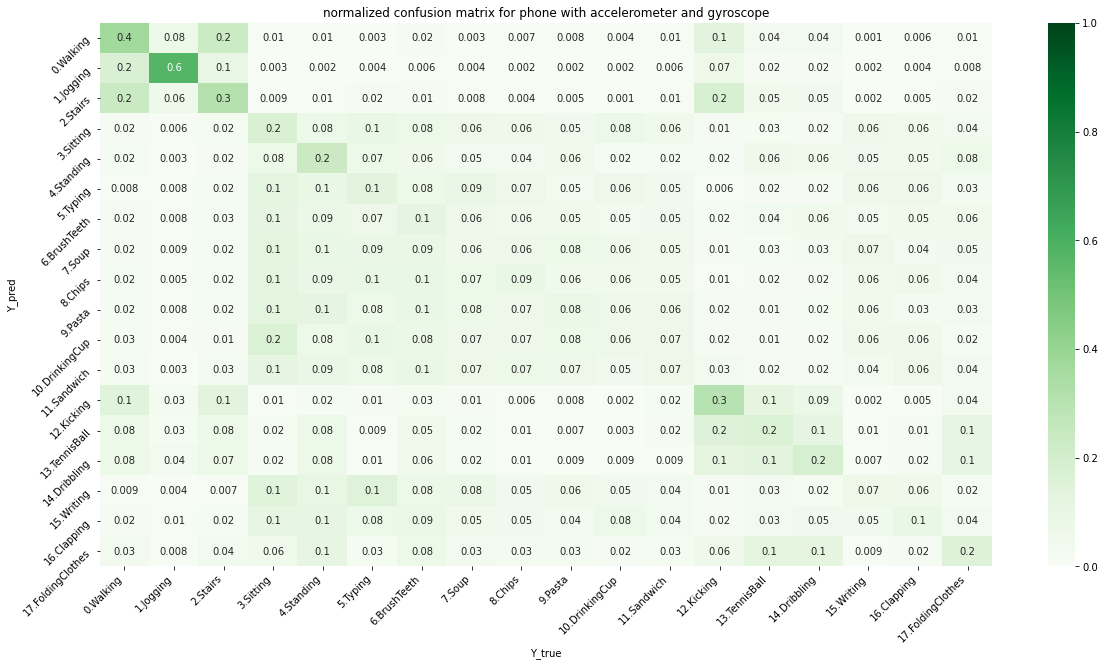

In [11]:
f, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(df_cm_all_norm,cmap = plt.cm.Greens,ax=ax,vmin=0, vmax=1,annot=True,fmt ='0.1g')


label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=45, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.xlabel('Y_true')
plt.ylabel('Y_pred')
plt.title('normalized confusion matrix for phone with accelerometer and gyroscope')
plt.savefig('all_phone_both.jpg', dpi = 300)
plt.show()


In [12]:
# classifier =  KNeighborsClassifier(n_neighbors = 5)
# classifier.fit(X_train, Y_train)
# Y_pred = classifier.predict(X_test)
# cm = confusion_matrix(Y_test,Y_pred)
# cm
# disp = plot_confusion_matrix(classifier, X_test,Y_test, display_labels=class_names, cmap=plt.cm.Blues, normalize='true')
# plt.savefig('all_watch_accel.jpg', dpi = 300)
# plt.figure(figsize=(100,100))
# plt.show()

In [13]:
# plt.figure(figsize = (10,10))  #This is the size of the image
# heatM = sns.heatmap(disp, vmin = -1, vmax = 1,center = 0, cmap = sns.diverging_palette(20, 220, n = 200),  square = True, annot = True) #this are the caracteristics of the heatmap
# heatM.set_ylim([19,0]) # This is the limit in y axis (number of features)